**Jade Chang**

Spring 2022

CS 251: Data Analysis and Visualization

# Lab 3b: Polynomial Regression

In [1]:
import os
import random
import numpy as np
import scipy.linalg
import matplotlib.pyplot as plt

plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])
plt.rcParams.update({'font.size': 15})
plt.rcParams.update({'figure.figsize': (10,6)})

np.set_printoptions(suppress=True, precision=5)

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

## Task 1: Import  datasets

1. Import training ('data/lab3b-400-training.csv') and testing ('data/lab3b-100-testing.csv') datasets into separate matrices using [genfromtxt](https://docs.scipy.org/doc/numpy/reference/generated/numpy.genfromtxt.html).
2. The column x is the independent variable.  Columns y1, y2, and y3 are dependent variables.  We will only be using y1.
3. Print the first 5 rows of each dataset.
4. Plot your dataset, column x and y1, with a title and axis labeled. 

In [2]:
training = np.genfromtxt('data/lab3b-400-training.csv', delimiter = ',')
testing = np.genfromtxt('data/lab3b-100-testing.csv', delimiter = ',')

print("Training dataset [A] first 5 rows:")
print(training[2:7,:])

print("Teseting dataset [AT] first 5 rows:")
print(testing[2:7,:])
print('''

--------------------------------------
Your results should look like
--------------------------------------
Training dataset [A] first 5 rows:
[[ 0.86084 -0.62216  3.93574 11.60028]
 [-0.30754  0.00447  4.675    8.86444]
 [ 0.77201 -0.79127  3.94762 10.83111]
 [-0.71808 -0.75327 11.83894  5.23568]
 [-0.28735  0.01856  8.7937   8.49431]]
Testing dataset [AT] first 5 rows:
[[-0.91878 -0.9357  22.11518  4.98345]
 [-0.92811 -1.16687 18.58222  3.34313]
 [-0.96837 -1.36751 13.3575   3.65102]
 [-0.96436 -1.62782 13.88831  4.08888]
 [-0.97014 -1.2789  24.96344  3.74772]]
''')

Training dataset [A] first 5 rows:
[[ 0.86084 -0.62216  3.93574 11.60028]
 [-0.30754  0.00447  4.675    8.86444]
 [ 0.77201 -0.79127  3.94762 10.83111]
 [-0.71808 -0.75327 11.83894  5.23568]
 [-0.28735  0.01856  8.7937   8.49431]]
Teseting dataset [AT] first 5 rows:
[[-0.91878 -0.9357  22.11518  4.98345]
 [-0.92811 -1.16687 18.58222  3.34313]
 [-0.96837 -1.36751 13.3575   3.65102]
 [-0.96436 -1.62782 13.88831  4.08888]
 [-0.97014 -1.2789  24.96344  3.74772]]


--------------------------------------
Your results should look like
--------------------------------------
Training dataset [A] first 5 rows:
[[ 0.86084 -0.62216  3.93574 11.60028]
 [-0.30754  0.00447  4.675    8.86444]
 [ 0.77201 -0.79127  3.94762 10.83111]
 [-0.71808 -0.75327 11.83894  5.23568]
 [-0.28735  0.01856  8.7937   8.49431]]
Testing dataset [AT] first 5 rows:
[[-0.91878 -0.9357  22.11518  4.98345]
 [-0.92811 -1.16687 18.58222  3.34313]
 [-0.96837 -1.36751 13.3575   3.65102]
 [-0.96436 -1.62782 13.88831  4.08888]
 [-0.

Text(0, 0.5, 'y1')

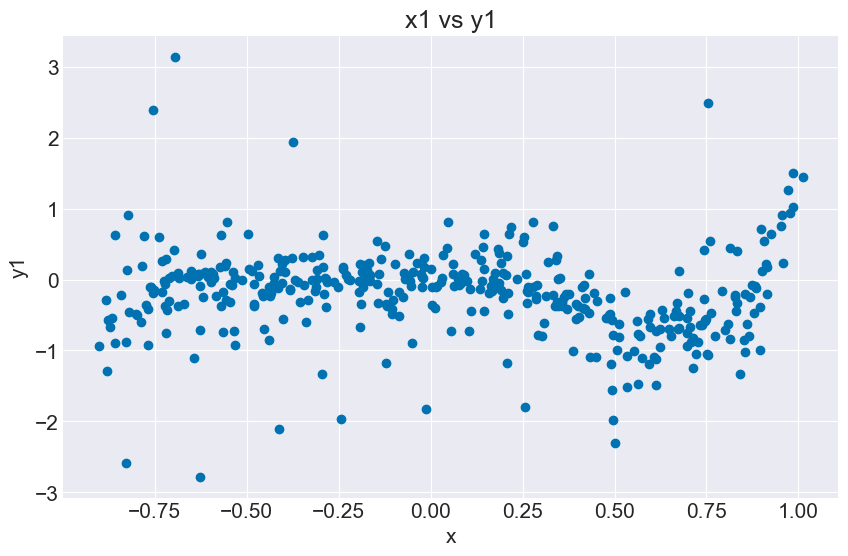

In [3]:
plt.scatter(training[:,0],training[:,1])
plt.title("x1 vs y1")
plt.xlabel("x")
plt.ylabel("y1")

## Task 2. 3 dimensional polynomial regression

### 2a. Make 3 polynomial matrices

$$
\left(\begin{array}{cccc} 
1 & x_0^1 & x_0^2 & x_0^3\\
1 & x_1^1 & x_1^2 & x_1^3\\
1 & x_2^1 & x_2^2 & x_2^3\\
1 & x_3^1 & x_3^2 & x_3^3\\
1 & x_4^1 & x_4^2 & x_4^3\\
... & ... & ... & ...\\
1 & x_n^1 & x_n^2 & x_n^3\\
\end{array}\right)
$$ 

1. Make a polynomial matrix for the training dataset using the independent variable
    * Create a matrix of [ones](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ones.html), `Ap`, with the same number of rows as the training dataset and 4 columns
    * Update the second column to be the respective x column, the third column to be the respective x column squared, and the fourth column to be the respective x column cubed.
    * Print the first 5 rows of the matrix
2. Make a polynomial matrix for the test dataset
    * Create a matrix of [ones](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ones.html), `ATp`, with the same number of rows as the test dataset and 4 columns
    * Like in the step above, update the second column to be the respective x column, the third column to be the respective x column squared, and the fourth column to be the respective x column cubed.
    * Print the first 5 rows of the matrix
3. Make a polynomial matrix to graph the prediction line
    * For graphing create a [linspace](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html), `line_x`, from the range of the test dataset's x column with 100 steps
    * Create a matrix of [ones](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ones.html), `lineM_x`, with the same number of rows as the length of `line_x` and 4 columns
    * Like in the step above, update the second column to be the respective x column, the third column to be the respective x column squared, and the fourth column to be the respective x column cubed.
    * Print the first 5 rows of the matrix

In [4]:
Ap = np.ones((training.shape[0]-2,4))
Ap[:,1] = training[2:,0]
Ap[:,2] = (training[2:,0])**2
Ap[:,3] = (training[2:,0])**3

ATp = np.ones((testing.shape[0]-2,4))
ATp[:,1] = testing[2:,0]
ATp[:,2] = (testing[2:,0])**2
ATp[:,3] = (testing[2:,0])**3

x = testing[2:,0]
line_x = np.linspace(x.min(), x.max(),100)

lineM_x = np.ones((line_x.shape[0],4))
lineM_x[:,1] = line_x
lineM_x[:,2] = line_x**2
lineM_x[:,3] = line_x**3


print("Ap first 5 rows: \n",Ap[:5,:])
print("ATp first 5 rows: \n",ATp[:5,:])
print("lineM_x first 5 rows\n",lineM_x[:5,:])

print('''
--------------------------------------
Your results should look like
--------------------------------------
Ap first 5 rows
[[ 1.       0.86084  0.74104  0.63792]
 [ 1.      -0.30754  0.09458 -0.02909]
 [ 1.       0.77201  0.596    0.46012]
 [ 1.      -0.71808  0.51564 -0.37027]
 [ 1.      -0.28735  0.08257 -0.02373]]
ATp first 5 rows
[[ 1.      -0.91878  0.84417 -0.77561]
 [ 1.      -0.92811  0.86139 -0.79946]
 [ 1.      -0.96837  0.93773 -0.90807]
 [ 1.      -0.96436  0.92999 -0.89685]
 [ 1.      -0.97014  0.94118 -0.91308]]
lineM_x first 5 rows
[[ 1.      -0.97014  0.94118 -0.91308]
 [ 1.      -0.94925  0.90107 -0.85534]
 [ 1.      -0.92835  0.86183 -0.80008]
 [ 1.      -0.90745  0.82347 -0.74726]
 [ 1.      -0.88656  0.78598 -0.69682]]
''')

Ap first 5 rows: 
 [[ 1.       0.86084  0.74104  0.63792]
 [ 1.      -0.30754  0.09458 -0.02909]
 [ 1.       0.77201  0.596    0.46012]
 [ 1.      -0.71808  0.51564 -0.37027]
 [ 1.      -0.28735  0.08257 -0.02373]]
ATp first 5 rows: 
 [[ 1.      -0.91878  0.84417 -0.77561]
 [ 1.      -0.92811  0.86139 -0.79946]
 [ 1.      -0.96837  0.93773 -0.90807]
 [ 1.      -0.96436  0.92999 -0.89685]
 [ 1.      -0.97014  0.94118 -0.91308]]
lineM_x first 5 rows
 [[ 1.      -0.97014  0.94118 -0.91308]
 [ 1.      -0.94925  0.90107 -0.85534]
 [ 1.      -0.92835  0.86183 -0.80008]
 [ 1.      -0.90745  0.82347 -0.74726]
 [ 1.      -0.88656  0.78598 -0.69682]]

--------------------------------------
Your results should look like
--------------------------------------
Ap first 5 rows
[[ 1.       0.86084  0.74104  0.63792]
 [ 1.      -0.30754  0.09458 -0.02909]
 [ 1.       0.77201  0.596    0.46012]
 [ 1.      -0.71808  0.51564 -0.37027]
 [ 1.      -0.28735  0.08257 -0.02373]]
ATp first 5 rows
[[ 1.      -0

### 2b. Calculate 3 dimensional polynomial regression
1.  Use [linalg.lstsq]() from scipy to calculate and print the weights, residuals and rank for the dependent variable `y1`. 
2.  Calculate and print the $R^2$ value.
    

In [9]:
c,*_ = scipy.linalg.lstsq(Ap,training[2:,1])

residuals = np.sum((training[2:,1]- Ap @ c)**2)
rank = np.linalg.matrix_rank(Ap)
R2_training = 1 - residuals / np.sum((training[2:,1] - np.mean(training[2:,1]))**2)
print("c:",c)
print("residuals: ", residuals)
print("rank:", rank)
print("r-squared:", R2_training)
print('''
--------------------------------------
Your results should look like
--------------------------------------
c: [-0.15511 -0.96979 -0.24675  1.61541]
residuals: 136.56714157926723
rank: 4
r-squared: 0.11595609001119211
''')

c: [-0.15511 -0.96979 -0.24675  1.61541]
residuals:  136.56714157926726
rank: 4
r-squared: 0.115956090011192

--------------------------------------
Your results should look like
--------------------------------------
c: [-0.15511 -0.96979 -0.24675  1.61541]
residuals: 136.56714157926723
rank: 4
r-squared: 0.11595609001119211



### 2c. Testing and prediction

1. calculate the $R^2$ for the linear regressions ability predict the test dataset
    1.  Multiply `ATp` with the weights to get the predicted values
    2.  Calculate the $R^2$ value and print it the dependent variable `y1`.
    > $R^2 = 1 - \frac{\sum_i \left (y_i - \hat{y}_i \right )^2}{\sum_i \left (y_i - \bar{y} \right )^2}$ <br> <br> $y_i$ are the dependent variable values from the test dataset <br> $\bar{y}_i$ is the mean of the dependent variable values from the test dataset <br> $\hat{y}_i$ is the y values *predicted* by the regression

2. Print the $R^2$ for the test dataset

In [13]:
y_pred = ATp @ c
residuals = np.sum((testing[2:,1]- ATp @ c)**2)
rank = np.linalg.matrix_rank(ATp)
R2_testing = 1 - residuals / np.sum((testing[2:,1] - np.mean(testing[2:,1]))**2)
print("R2 test: ",R2_testing)



print('''
--------------------------------------
Your results should look like
--------------------------------------
r2 test: 0.4431027176546438
''')

R2 test:  0.4431027176546437

--------------------------------------
Your results should look like
--------------------------------------
r2 test: 0.4431027176546438



### Task 3) Visualize the Results
In one plot:
1. Graph the training data as a scatter plot.
1. Graph the test dataset as a scatter plot.
1. Graph the prediction line
    1. the independent variable is line_x
    2. the dependent variable is lineM_x multiplied with the weights for the independent variable.
1. Include a title (with the two $R^2$ values), axis labels, and a legend

Text(0.5, 1.0, 'R2 of training data = 0.116, R2 of test data = 0.443')

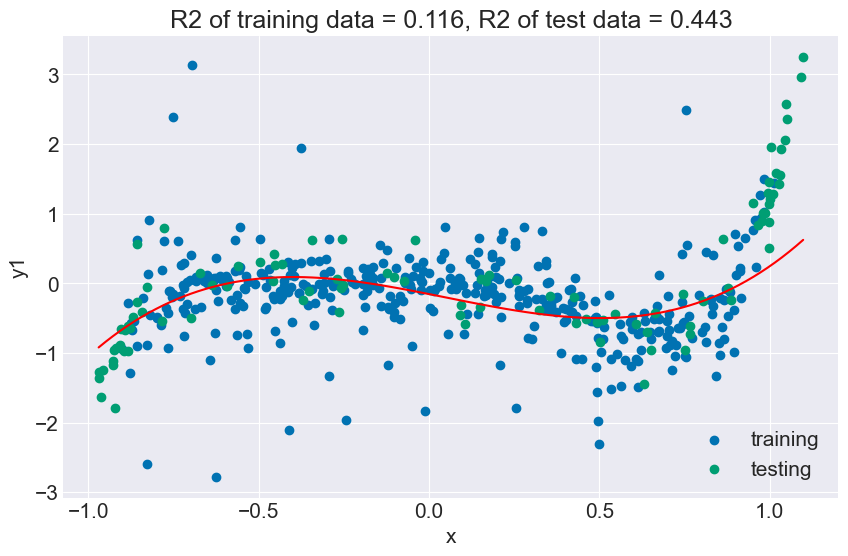

In [26]:
plt.scatter(training[:,0],training[:,1])
plt.scatter(testing[:,0],testing[:,1])

plt.plot(line_x,lineM_x@c, c = 'r')
plt.xlabel("x")
plt.ylabel("y1")
plt.legend(['training', 'testing'])

plt.title(f"R2 of training data = {R2_training:0.3f}, R2 of test data = {R2_testing:0.3f}")